# tSNE for all type of SED Spectra

- author : Sylvie Dagoret-Campagne
- affiliation  : IJCLab
- creation date : 2023/01/18
- last update : 2023/01/18


- Intuitive introduction on t-SNE on You Tube by Kimia lab : https://www.youtube.com/watch?v=HyYZWP8S2bA

- Nice reading here : https://distill.pub/2016/misread-tsne/

- scikit-learn : https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#examples-using-sklearn-manifold-tsne

and more on non-linear manifold learning : https://scikit-learn.org/stable/modules/manifold.html#t-sne

- https://github.com/JospehCeh/PhotoZ_PhD/tree/u/dagoret

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.manifold import TSNE

from sklearn import manifold
from time import time

from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
import numpy as np
import os
from matplotlib.ticker import FormatStrFormatter, NullFormatter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))
from itertools import cycle
import copy

In [4]:
from astropy.io import fits
import pickle

In [5]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.left': True,
          'figure.figsize': [18, 10],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)


## Start

In [6]:
cwd=os.path.abspath("")
main_dir = cwd
print(f"notebook current executing path : {cwd}")

notebook current executing path : /Users/sylvie/MacOSX/GitHub/LSST/PhotoZ_PhD/tSNE


## Config

In [7]:
FLAG_CHECK_CONVERGENCE = False   # check if the number of iteration is OK
FLAG_VIEW_CLUSTERING = True     # View the result of clustering
FLAG_PCA_ONCLUSTERS = True       # Do PCA inside each cluster

## Read input file

### Choose the type of input:

- infile_idx=0 : StarLight
- infile_idx=1 : Brown
- infile_idx=2 : Bruzual-Charlot

In [8]:
all_filenames = ['datatools/spectra_SL_data.fits','datatools/spectra_Brown_data.fits','datatools/spectra_BruzualCharlot_data.fits']
all_filenames_labels = ["StarLight","Brown","Bruzual-Charlot"]
all_filenames_tags = ["SL","BR","BC"]


# choose the SED
infile_idx=0

the_filename_label = all_filenames_labels[infile_idx]
the_filename_tag = all_filenames_tags[infile_idx]


filename = all_filenames[infile_idx]
hdu = fits.open(filename)
data_in=hdu[0].data
hdr_in = hdu[0].header

In [9]:
NSED = data_in.shape[0]-3
NWL = data_in.shape[1]-1

In [10]:
wavelengths = data_in[0,1:] 
flambdas_average = data_in[1,1:] 
flambdas_std = data_in[2,1:] 
spec = data_in[3:,1:] 
all_numbers = data_in[3:,0] 

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_27454/3365842016.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 0, '$\\lambda (\\AA)$')

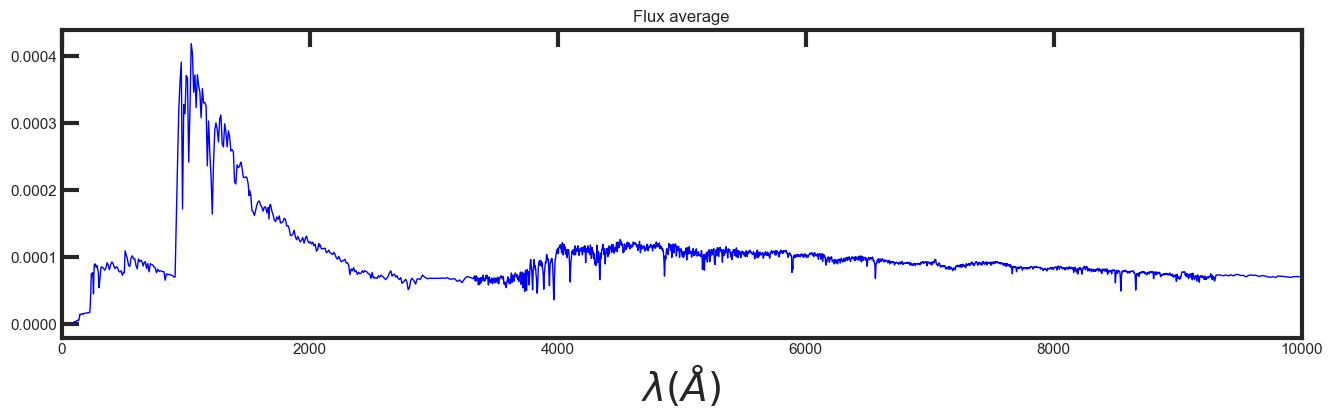

In [11]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-',lw=1)
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")
plt.xlabel("$\lambda (\AA)$")

# Normalize the data

- this standardisation is mandatory here

In [12]:
X = copy.deepcopy(spec)
#X = copy.deepcopy((spec - np.mean(spec, axis=0)) / np.std(spec, axis=0))

## t-SNE method

https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

In [13]:
n_components = 2

In [14]:
#X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X)

## Plot


### Plot wrt perplexity (almost number of neighbourgs)

circles, perplexity=1 in 0.84 sec
circles, perplexity=3 in 0.59 sec
circles, perplexity=5 in 0.65 sec
circles, perplexity=7 in 0.6 sec
circles, perplexity=9 in 0.64 sec
circles, perplexity=10 in 0.63 sec
circles, perplexity=20 in 0.69 sec
circles, perplexity=30 in 0.75 sec
circles, perplexity=50 in 0.8 sec
circles, perplexity=70 in 0.88 sec
circles, perplexity=100 in 1 sec
circles, perplexity=200 in 1.5 sec
circles, perplexity=300 in 1.5 sec
circles, perplexity=400 in 1.7 sec
circles, perplexity=500 in 1.6 sec


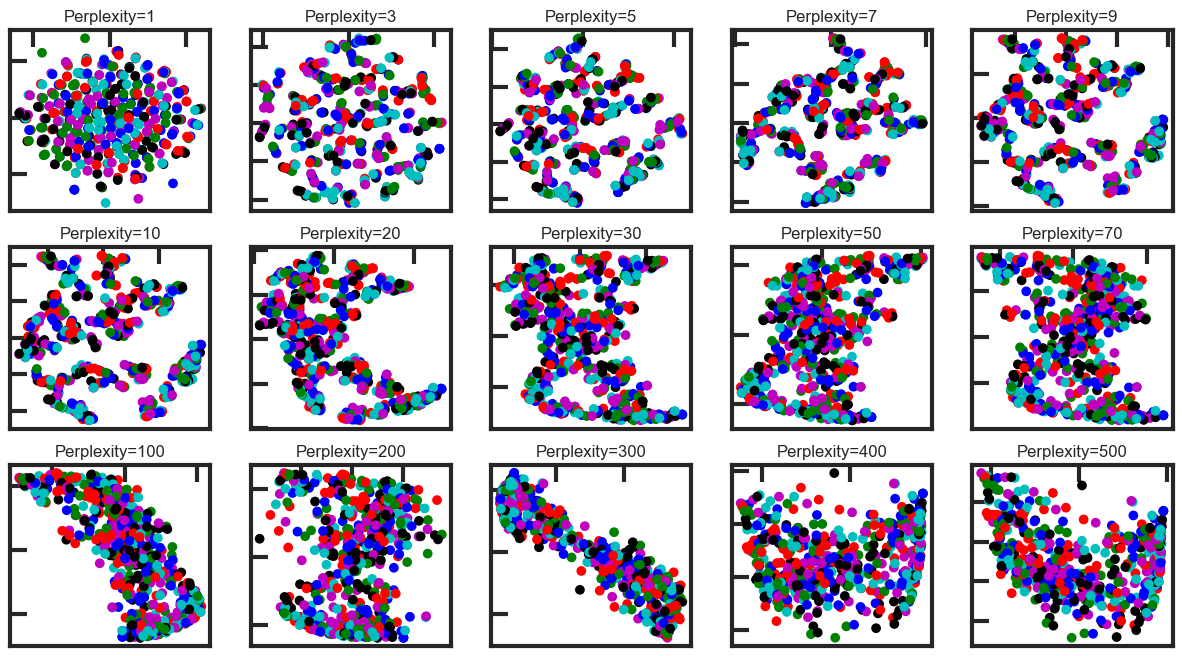

In [15]:
Nplot = 15
nrow=3
ncol=5


perplexities = [1, 3 , 5, 7, 9,
                10, 20, 30, 50, 70,
                100, 200, 300, 400,500]

Np=len(perplexities)

(fig, axs) = plt.subplots(3, 5, figsize=(15, 8))

nplots = Np
ncols = 5
nrows = nplots//ncols 
if nplots/ncols> nrows:
    nrows+=1


cycol = cycle('bgrcmk')

all_cols = [ next(cycol) for i in range(NSED)]

for iperp, perplexity in enumerate(perplexities):
    
    irow=iperp//ncols
    icol=iperp-irow*ncols
    
    ax = axs[irow,icol]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=500,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=all_cols)
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")




circles, niter=250 perplexity=7 in 0.42 sec
circles, niter=300 perplexity=7 in 0.46 sec
circles, niter=400 perplexity=7 in 0.6 sec
circles, niter=500 perplexity=7 in 0.79 sec
circles, niter=800 perplexity=7 in 1.1 sec
circles, niter=1000 perplexity=7 in 1.2 sec
circles, niter=2000 perplexity=7 in 2.4 sec
circles, niter=3000 perplexity=7 in 3.4 sec
circles, niter=5000 perplexity=7 in 5.5 sec
circles, niter=8000 perplexity=7 in 8.5 sec


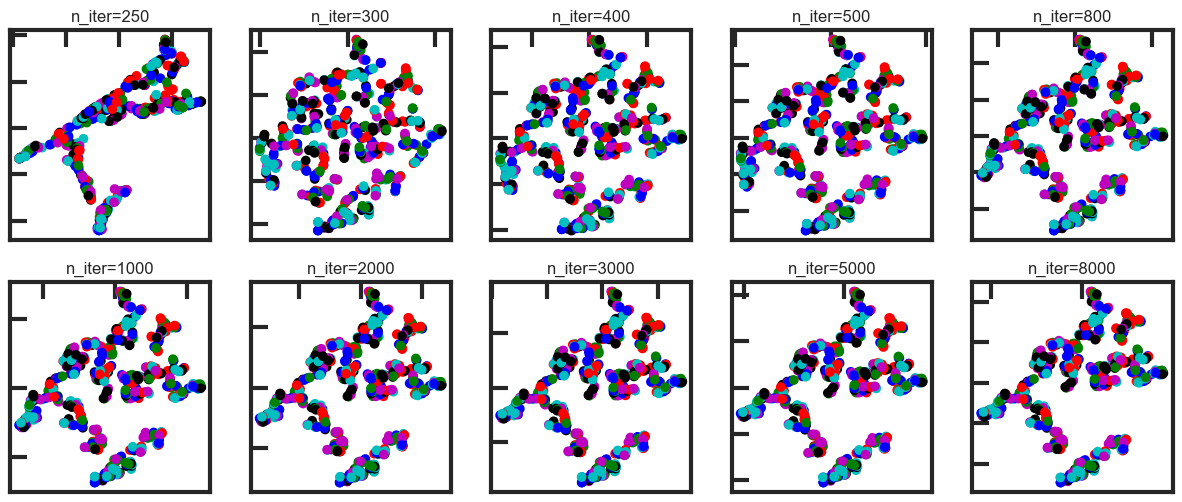

In [16]:
Nplot = 15
nrow=2
ncol=5


Niter = [250, 300, 400, 500, 800, 
         1000, 2000, 3000, 5000, 8000 ]

Nitertot=len(Niter)

(fig, axs) = plt.subplots(2, 5, figsize=(15, 6))

nplots = Nitertot
ncols = 5
nrows = nplots//ncols 
if nplots/ncols> nrows:
    nrows+=1

perplexity = 7

cycol = cycle('bgrcmk')

all_cols = [ next(cycol) for i in range(NSED)]

for ii, n_iter in enumerate(Niter):
    
    
    irow=ii//ncols
    icol=ii-irow*ncols
    
    ax = axs[irow,icol]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=n_iter,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, niter=%d perplexity=%d in %.2g sec" % (n_iter,perplexity ,t1 - t0))
    ax.set_title("n_iter=%d" % n_iter)
    ax.scatter(Y[:, 0], Y[:, 1], c=all_cols)
    
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Select a perplexity and number of iterations

In [17]:
perplexity=7

In [18]:
n_iter = 2000

In [19]:
tsne = manifold.TSNE(n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=n_iter,
    )

In [20]:
Y = tsne.fit_transform(X)

## Position of inputs on t-SNE map

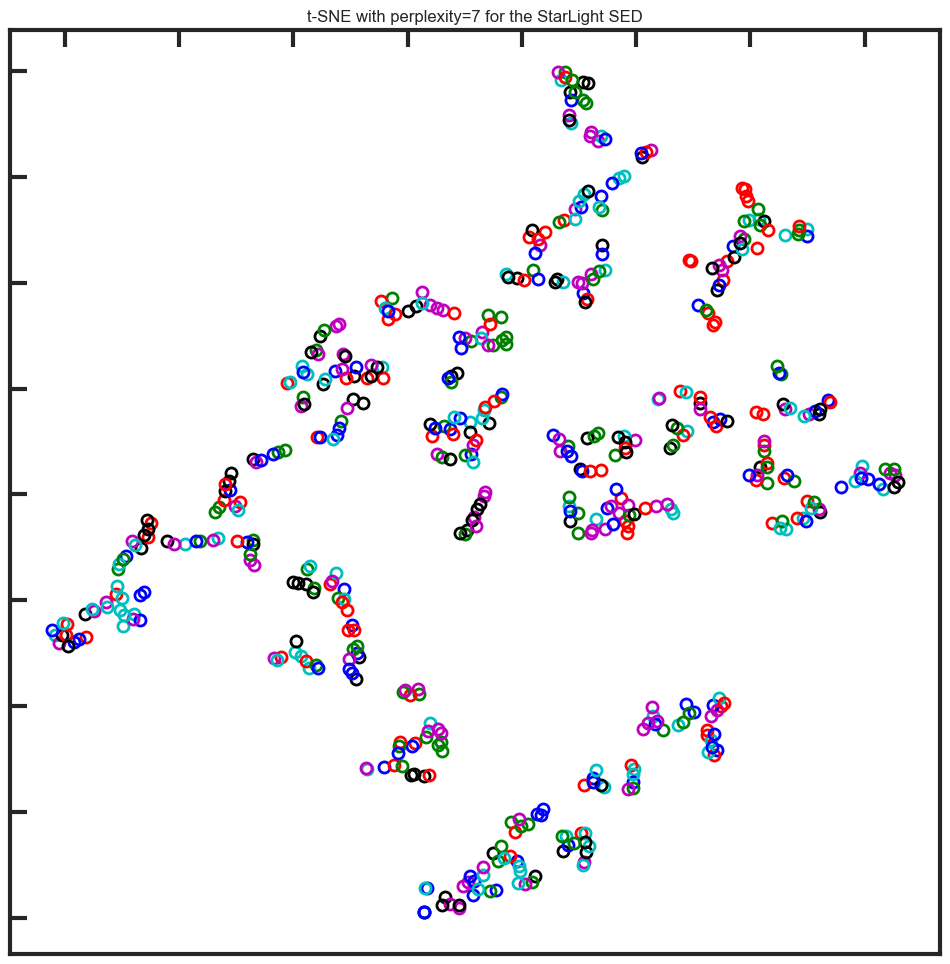

In [21]:
cycol = cycle('bgrcmk')

plt.figure(figsize=(12, 12))


for cnt, xy in enumerate(Y):
   
    # place a marker on the winning position for the sample xx
    plt.plot(xy[0], xy[1], 'o', markerfacecolor='None',markeredgecolor=next(cycol), markersize=8, markeredgewidth=2)

the_title = f"t-SNE with perplexity={perplexity} for the {the_filename_label} SED" 
plt.title(the_title)

ax = plt.gca()
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis("tight")

plt.show()

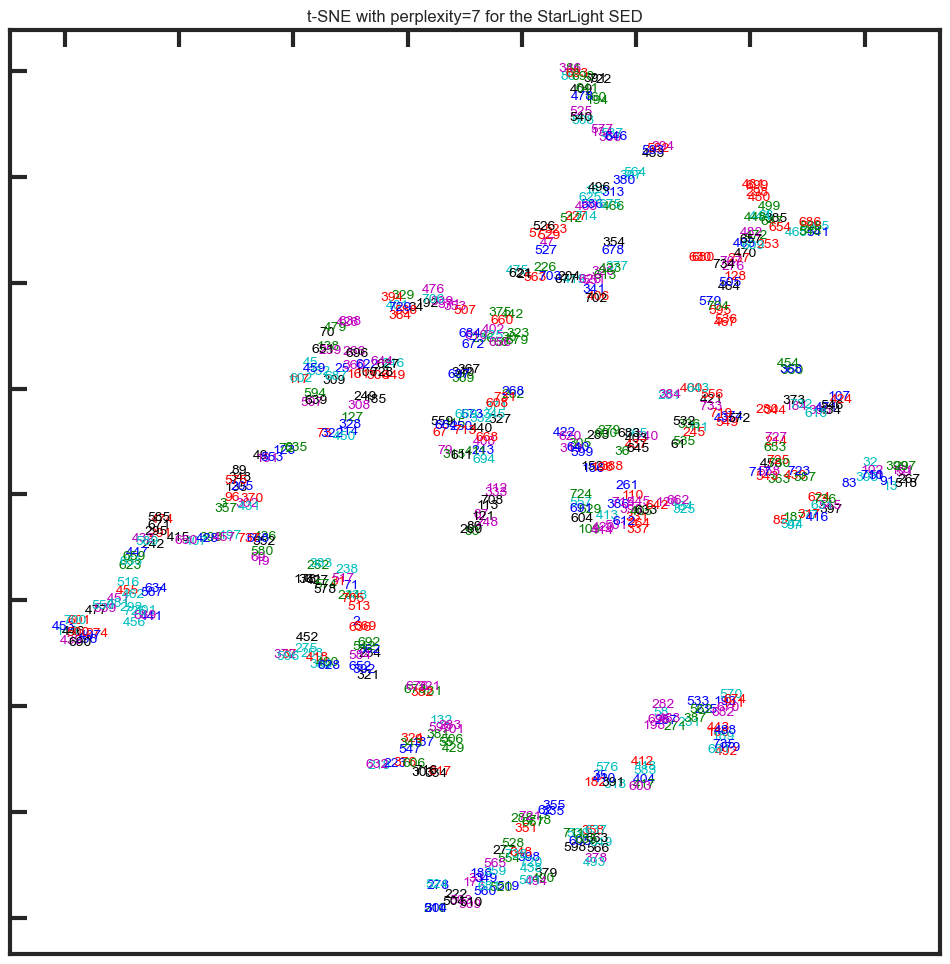

In [22]:
cycol = cycle('bgrcmk')

plt.figure(figsize=(12.0, 12.0))


for cnt, xy in enumerate(Y):
   
    # place a marker on the winning position for the sample xx
    the_num=int(all_numbers[cnt])
    the_num_str=str(the_num)
    ax = plt.gca()
    
    plt.plot(xy[0], xy[1], '.', markerfacecolor='None',markeredgecolor='k', markersize=0, markeredgewidth=0,alpha=0)
    #plt.text(xy[0],xy[1],the_num, color=next(cycol),ha="center", va="center",transform=ax.transAxes,fontsize=10,fontweight="bold")
    plt.annotate(the_num_str, (xy[0],xy[1]),color=next(cycol),xycoords='data',fontsize=10)
    
the_title = f"t-SNE with perplexity={perplexity} for the {the_filename_label} SED" 
plt.title(the_title)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis("tight")

plt.show()

## Clustering on t-SNE

In [23]:
from sklearn.cluster import KMeans

In [24]:
if not FLAG_VIEW_CLUSTERING:
    assert False

In [25]:
all_positions = []
for cnt, xy in enumerate(Y):
    all_positions.append(xy)
all_positions=np.vstack(all_positions)

In [26]:
X1=all_positions

In [27]:
n_clu = 30
km = KMeans(n_clusters = n_clu)
estimator = km.fit(X1)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)
N=X1.shape[0] 

centroids:  [[  3.3540552 -66.6414   ]
 [ 12.594668    8.611058 ]
 [-66.160324   -9.888636 ]
 [ 14.989873   58.210495 ]
 [-19.325977   35.43173  ]
 [-34.183983  -30.34581  ]
 [ 48.647636   -4.051098 ]
 [-31.869339   25.028938 ]
 [ 29.82298   -43.29716  ]
 [ 42.0835     50.979572 ]
 [ 10.946434   40.841484 ]
 [ -7.491807   27.739326 ]
 [ 47.943653   17.524443 ]
 [  9.921738   73.84706  ]
 [-50.429935   -9.762791 ]
 [-74.63155   -23.648565 ]
 [ 16.04619   -53.90439  ]
 [-19.036156  -46.685062 ]
 [ 62.00168     3.0756721]
 [-10.244162   11.953743 ]
 [-11.220845  -75.37132  ]
 [ 16.174753   -3.737369 ]
 [ 43.024837    5.0510073]
 [  2.0227544  45.712254 ]
 [-35.114582   14.972157 ]
 [ 33.44966    39.644337 ]
 [ 29.530144   14.628623 ]
 [-49.443268    1.9949569]
 [-34.711063  -17.443676 ]
 [ -8.402879   -4.080135 ]]
labels:  [ 5 27 17 18 14 23  7 11 28 18 20  4 16  1  5  7 23 27 18 17 23  8 18 26
  0 11 19  9 14  7 28 27 24  6 19 29 18 13  6 13 29 27 18 29 27  6 18  7
 12 21 21 26 29 29 24 

/Users/sylvie/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [29]:
mydict

{0: array([ 24, 137, 145, 180, 194, 198, 200, 220, 221, 240, 279, 325, 327,
        328, 333, 355, 357, 379, 389, 419, 426, 453, 464, 465, 479, 481,
        499, 523, 529, 531, 532, 549]),
 1: array([ 13,  71,  72,  92, 112, 139, 143, 157, 166, 207, 230, 245, 264,
        278, 420, 421, 436, 456, 461, 497]),
 2: array([113, 146, 149, 249, 257, 274, 288, 314, 407, 411, 439, 450, 466,
        471, 475, 485]),
 3: array([ 81, 148, 159, 162, 222, 307, 310, 323, 329, 387, 404, 408, 414,
        441, 489, 525]),
 4: array([ 11,  89, 175, 184, 196, 206, 236, 243, 316, 338, 394, 410, 519,
        540]),
 5: array([  0,  14, 107, 123, 135, 167, 204, 214, 231, 234, 260, 293, 301,
        367, 392, 406, 417, 444, 452, 468, 505]),
 6: array([ 33,  38,  45,  85, 164, 239, 258, 369, 370, 440, 447, 547]),
 7: array([  6,  15,  29,  47,  67,  74, 117, 124, 130, 158, 161, 195, 202,
        268, 290, 300, 319, 438, 443, 454, 460, 467, 501, 509, 539]),
 8: array([ 21,  68,  78,  86,  87,  90,  94, 105, 1

# be carefull 

- kmean predicts want single floats

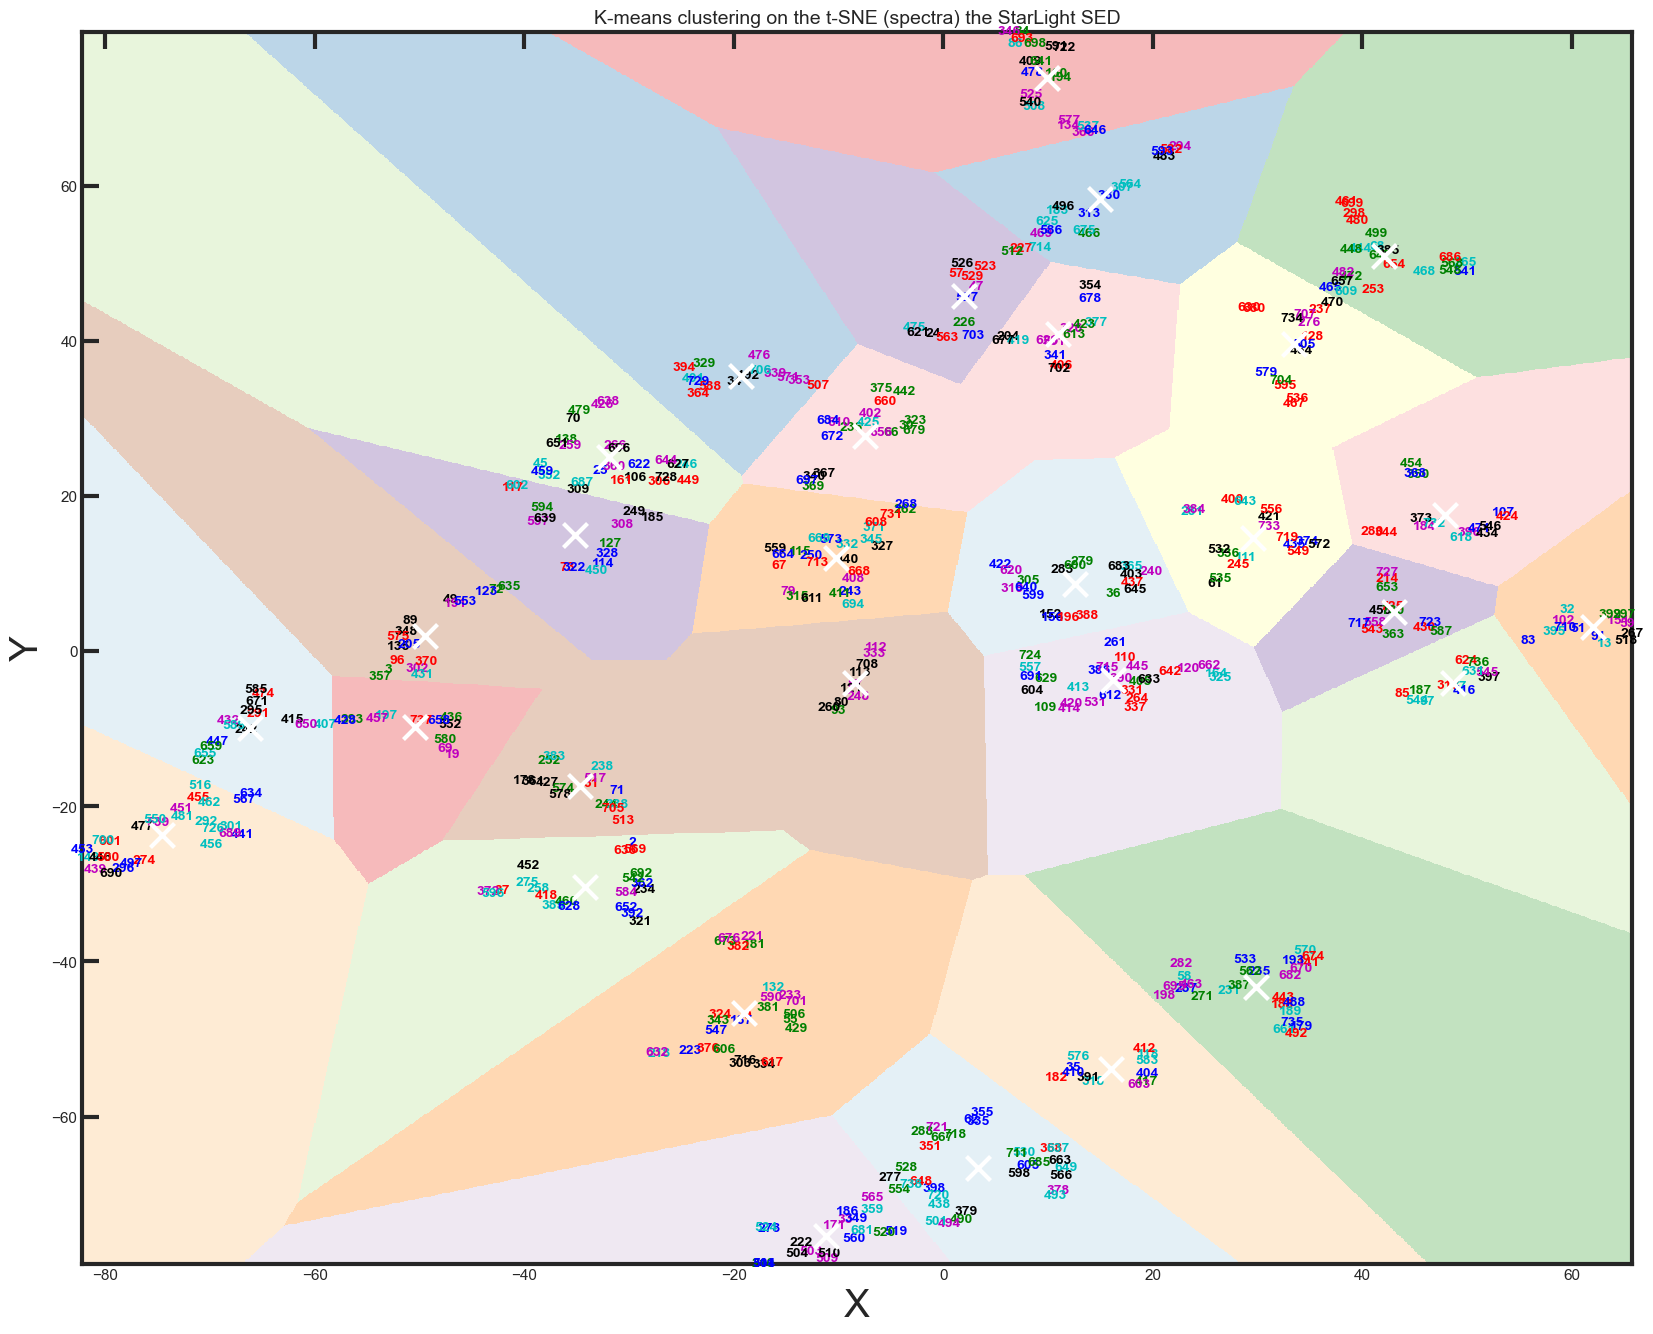

In [30]:
if 1:
    cycol = cycle('bgrcmk')

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .1  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X1[:, 0].min() , X1[:, 0].max() 
    y_min, y_max = X1[:, 1].min() , X1[:, 1].max() 
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    xx=xx.astype(np.single)
    yy=yy.astype(np.single)

    arr0 = np.c_[xx.ravel(), yy.ravel()]
    arr1 =arr0.astype(np.single)
    # Obtain labels for each point in mesh. Use last trained model.
    #Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = km.predict(arr1)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,16))
    plt.clf()
    
    plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",alpha=0.3
    )

    #plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

    for cnt in range(N):
        the_num=int(all_numbers[cnt])
        plt.text(X1[cnt, 0],X1[cnt, 1],the_num, color=next(cycol),ha="center", va="center",fontsize=10,fontweight="bold")


    # Plot the centroids as a white X
    centroids = km.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=300,
        linewidths=3,
        color="w",
        zorder=10,
    )

    the_title = f"K-means clustering on the t-SNE (spectra) the {the_filename_label} SED" 
    plt.title(the_title,fontsize=14)


    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    plt.xlabel("X")
    plt.ylabel("Y")
    #plt.xticks(())
    #plt.yticks(())
    plt.show()

## Plot Groups of Spectra

In [31]:
# n_clu
ncols = 2
nrows = n_clu//ncols 
if n_clu/ncols> nrows:
    nrows+=1

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_27454/3455780049.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


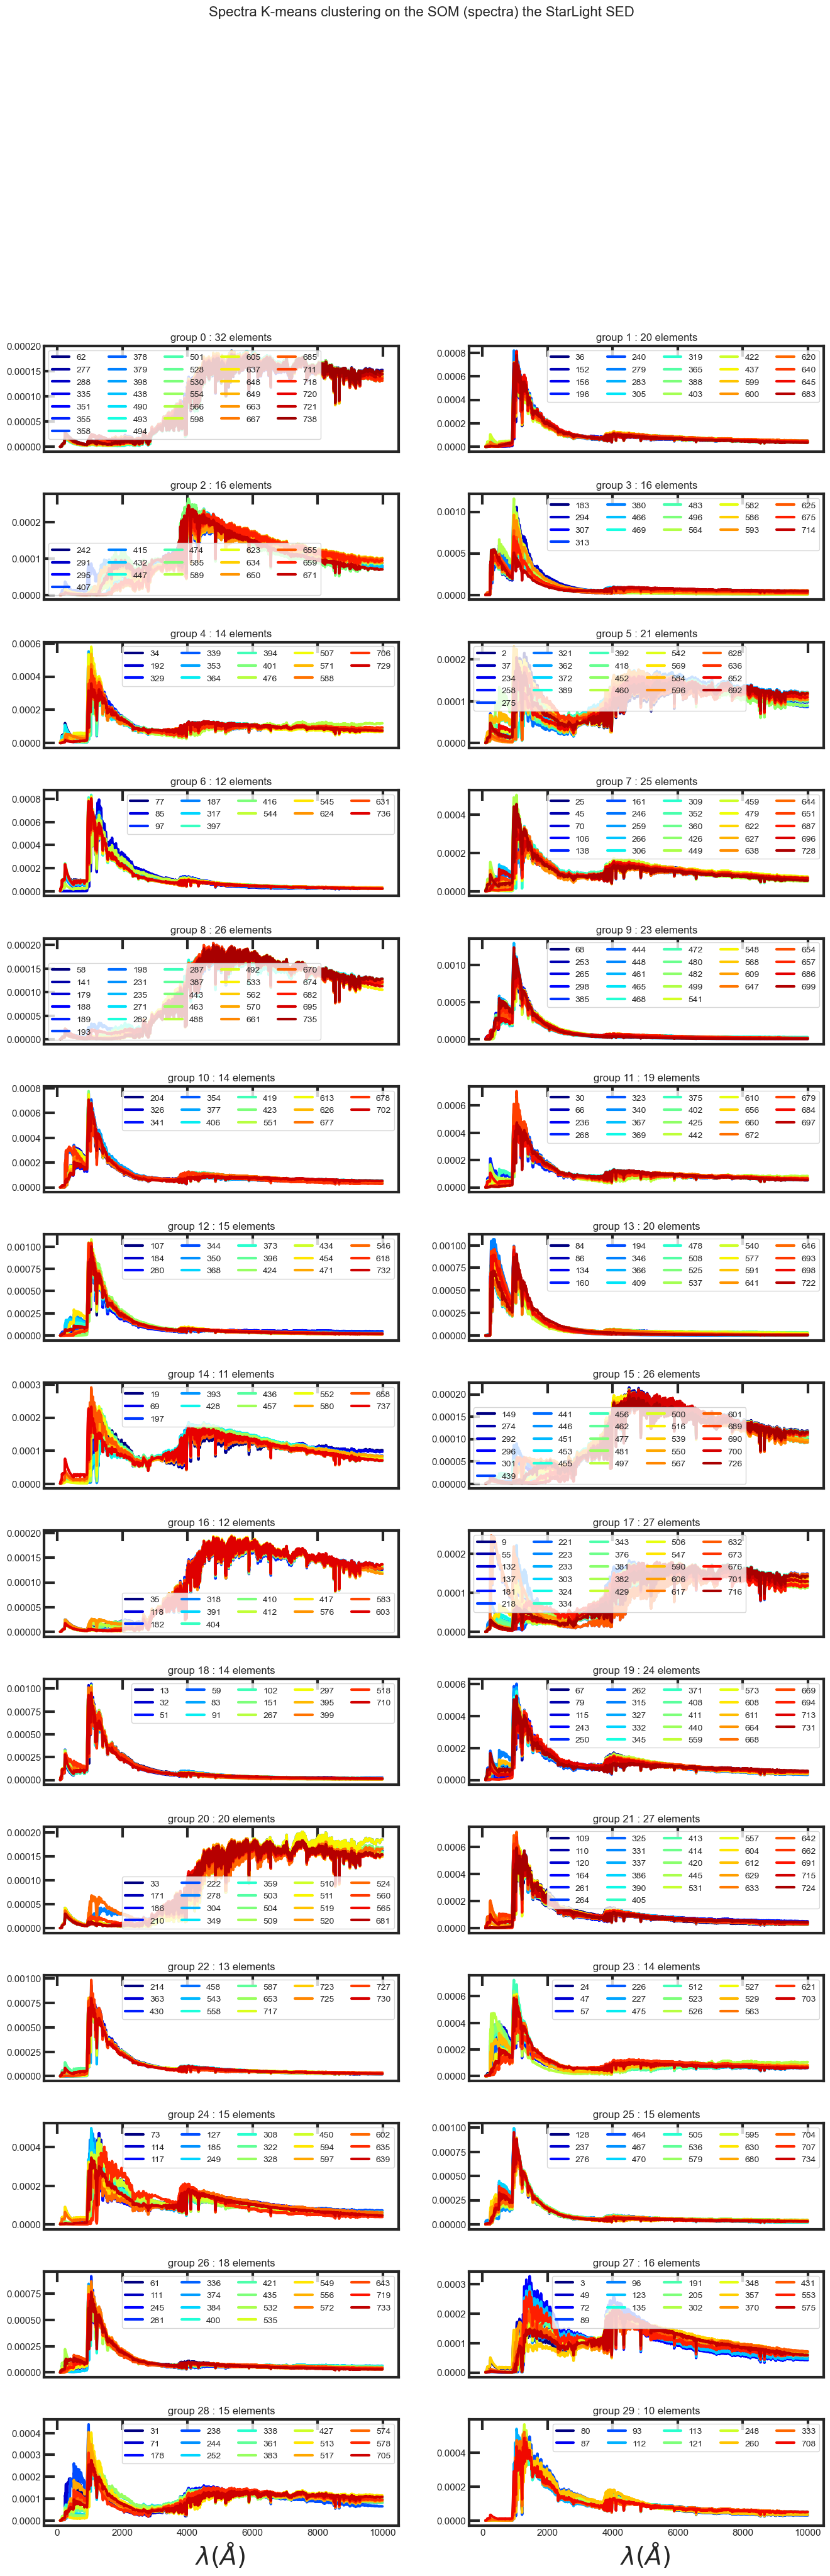

In [32]:

if ncols==2:
    fig = plt.figure(figsize=(16,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
elif ncols==4:
    fig = plt.figure(figsize=(20,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
elif ncols==1:
    fig = plt.figure(figsize=(10,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
else:
    fig = plt.figure(figsize=(20,nrows*3))
    gs = fig.add_gridspec(nrows, ncols, hspace=0.4, wspace=0.2)
    
    
#axs  = gs.subplots(sharex='col', sharey='row')
axs  = gs.subplots(sharex='col')

for icluster in range(km.n_clusters):
    
    irow=icluster//ncols
    icol=icluster-irow*ncols
    
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        axs[irow,icol].plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
        
    axs[irow,icol].set_title(f"group {icluster} : {NTOPLOT} elements")
    if irow==nrows-1:
        axs[irow,icol].set_xlabel("$\lambda (\AA)$ ")
    axs[irow,icol].legend(loc="best",ncol=5,fontsize=10)

the_title = f"Spectra K-means clustering on the SOM (spectra) the {the_filename_label} SED" 
plt.suptitle(the_title,fontsize=16,y=1)

plt.tight_layout()
plt.show()

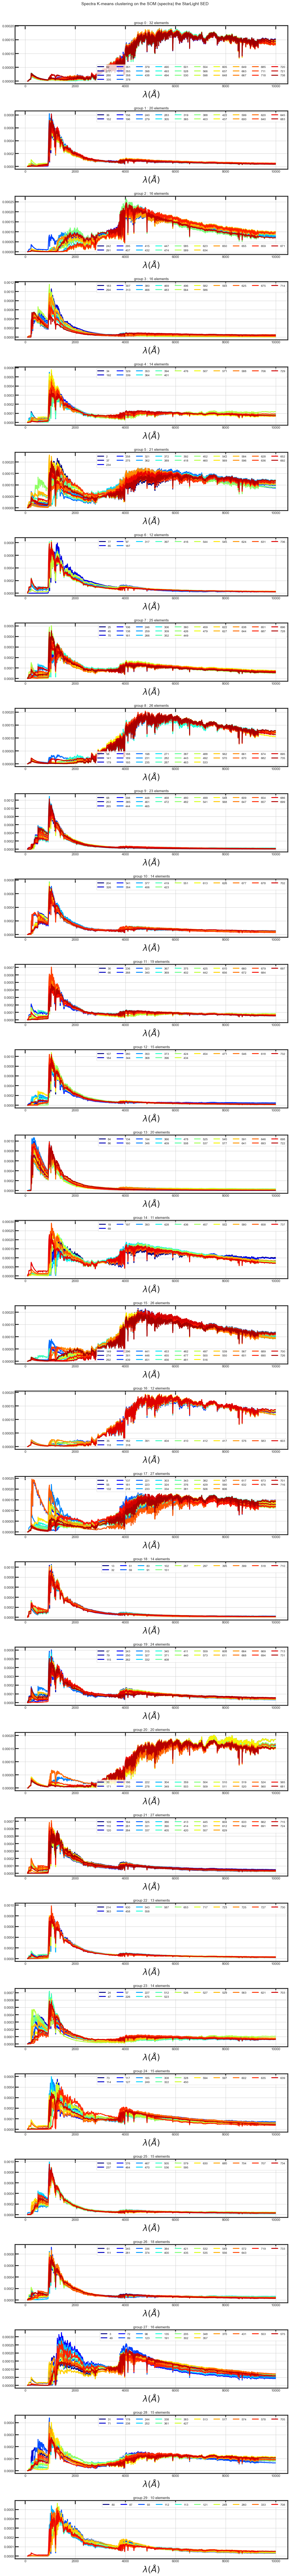

In [33]:
fig = plt.figure(figsize=(14, km.n_clusters*4))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
    ax.grid()
        
the_title = f"Spectra K-means clustering on the SOM (spectra) the {the_filename_label} SED" 
plt.suptitle(the_title,fontsize=14,y=1)

plt.tight_layout()
plt.show()

## Cluster analysis : PCA on each cluster 

- Info on clustering will be saved in a dictionnary stored in a pickle file

In [34]:
if FLAG_PCA_ONCLUSTERS:
    print(FLAG_PCA_ONCLUSTERS)
else:
    assert False

True


In [35]:
out_file = f"{the_filename_tag}_tSNE_onSpectr_clusters_{n_clu}.pickle"

### Create main dictionnary

In [36]:
out_dictionary = {}
out_dictionary["nclu"] = n_clu
out_dictionary["wavelengths"] = wavelengths

In [37]:
# loop on clusters
for idx_sel_group  in range(n_clu):
    
    # create cluster dictionnary
    clu_dictionary = {}
    
    # get all reative indexes of spectra
    the_group_id = mydict[idx_sel_group]
      
    N_group = len(the_group_id)
    the_spectra_of_thisgroup = spec[the_group_id,:]
    the_spectra_number_ofthisgroup=all_numbers[the_group_id]
    
    # number of spectra in this group
    clu_dictionary["nspec"]=N_group
    
    #fill the cluster dictionnary with true SL numbers
    clu_dictionary["numbers_spectra"]=the_spectra_number_ofthisgroup
    
    #prepare for PCA
    X2=copy.deepcopy(the_spectra_of_thisgroup)
    X2_mean=np.mean(X2, axis=0)
    X2-=X2_mean
    #fill the cluster dictionnary with the average spectrum
    clu_dictionary["mean_spectra"] = X2_mean
    
    Ncomp=min(N_group,5)
    pca = PCA(n_components=Ncomp)
    pca.fit(X2)
    evals = pca.explained_variance_  # eigen-values
    evals_cs = evals.cumsum() # cumulated sum
    evals_cs /= evals_cs[-1]
    
    # backup result of PCA analysis in this clu_dictionary
    clu_dictionary["ncomp"]=Ncomp
    clu_dictionary["evals"]=evals
    clu_dictionary["evals_cs"]=evals_cs
    
    #print(f"group {idx_sel_group}, n={N_group}, val=",evals," frac=",evals_cs)
    out_dictionary[idx_sel_group]  = clu_dictionary
    

In [38]:
with open(out_file, 'wb') as handle:
    pickle.dump(out_dictionary, handle)

In [39]:
with open(out_file, 'rb') as handle:
    data_clu = pickle.load(handle)

In [40]:
clu_nspec_stat = np.array([data_clu[ii]['nspec'] for ii in range(data_clu['nclu'])])
clu_evals0_stat = np.array([data_clu[ii]['evals'][0] for ii in range(data_clu['nclu'])])
clu_evals_cs0_stat = np.array([data_clu[ii]['evals_cs'][0] for ii in range(data_clu['nclu'])])

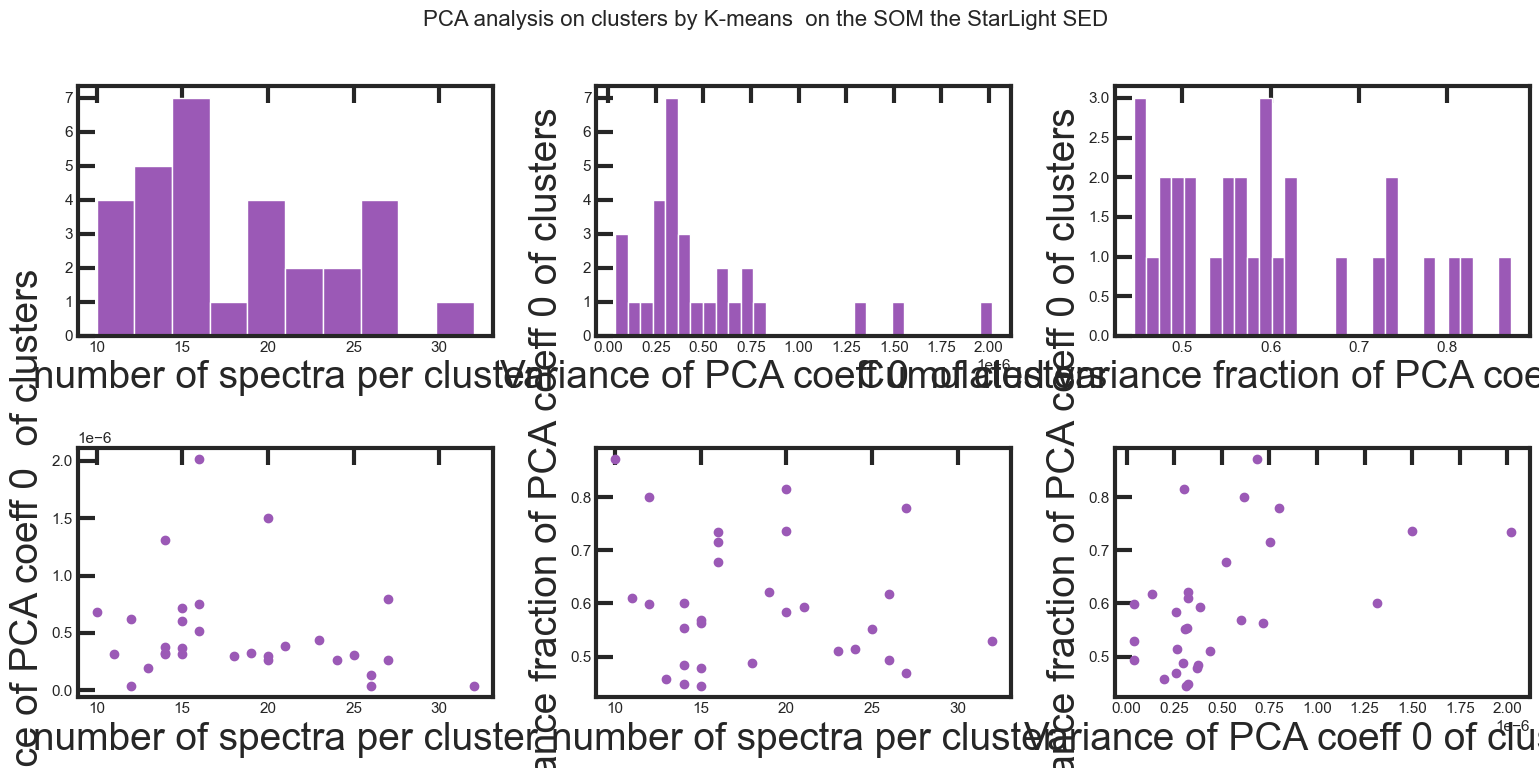

In [41]:
fig,axs = plt.subplots(2,3,figsize=(16,8))

ax=axs[0,0]
ax.hist(clu_nspec_stat)
ax.set_xlabel("number of spectra per cluster")

ax=axs[0,1]
ax.hist(clu_evals0_stat,bins=30)
ax.set_xlabel("Variance of PCA coeff 0  of clusters")

ax=axs[0,2]
ax.hist(clu_evals_cs0_stat,bins=30)
ax.set_xlabel("Cumulated variance fraction of PCA coeff 0 of clusters")

ax=axs[1,0]
ax.scatter(clu_nspec_stat,clu_evals0_stat,marker='o')
ax.set_ylabel("Variance of PCA coeff 0  of clusters")
ax.set_xlabel("number of spectra per cluster")

ax=axs[1,1]
ax.scatter(clu_nspec_stat,clu_evals_cs0_stat,marker='o')
ax.set_ylabel("Cumulated variance fraction of PCA coeff 0 of clusters")
ax.set_xlabel("number of spectra per cluster")

ax=axs[1,2]
ax.scatter(clu_evals0_stat,clu_evals_cs0_stat,marker='o')
ax.set_ylabel("Cumulated variance fraction of PCA coeff 0 of clusters")
ax.set_xlabel("Variance of PCA coeff 0 of clusters")

the_title = f"PCA analysis on clusters by K-means  on the SOM the {the_filename_label} SED" 
plt.suptitle(the_title,fontsize=16)

plt.tight_layout()
plt.show()

## Convergence

In [42]:
if not FLAG_CHECK_CONVERGENCE:
    assert False

AssertionError: 